In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# import dataframes
path = r'...'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [3]:
df.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


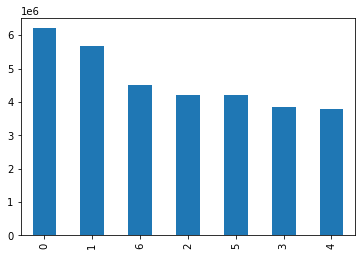

In [4]:
# bar chart
bar = df['order_day_of_week'].value_counts().plot.bar()

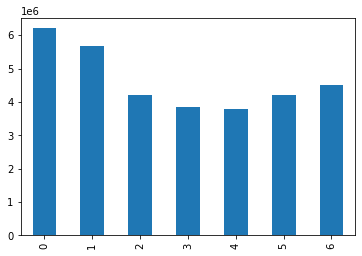

In [5]:
# bar chart - sorted
sorted_bar = df['order_day_of_week'].value_counts().sort_index().plot.bar()

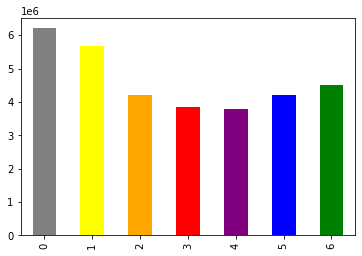

In [6]:
# bar chart - sorted and color coded
colored_bar = df['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['gray', 'yellow', 'orange', 'red', 'purple', 'blue', 'green'])

In [7]:
# export chart as png image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

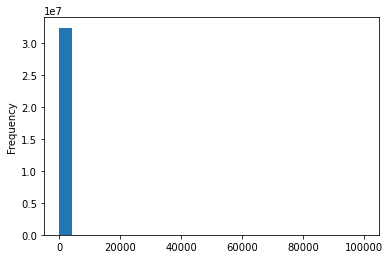

In [8]:
# create histogram
hist = df['prices'].plot.hist(bins = 25)

In [9]:
df['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [10]:
df['prices'].mean()

11.98022563865405

In [11]:
df['prices'].median()

7.4

In [12]:
df['prices'].max()

99999.0

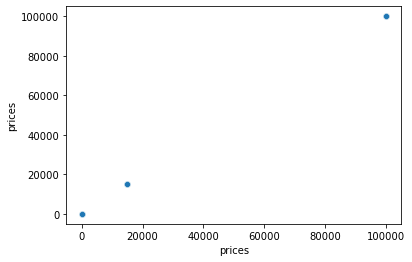

In [13]:
# create scatterplot
scatterplot = sns.scatterplot(x = 'prices', y = 'prices', data = df)

In [14]:
# mark prizes over 100 as Nan
df.loc[df['prices'] >100, 'prices'] = np.nan

In [15]:
df['prices'].max()

25.0

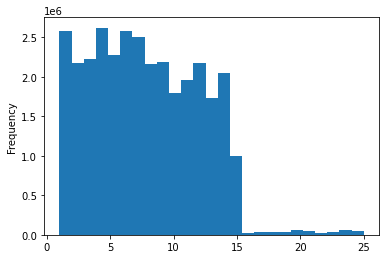

In [16]:
# check with histogram
histogram_25 = df['prices'].plot.hist(bins = 25)

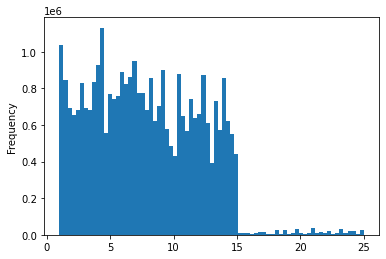

In [17]:
# more precise:
histogram_75 = df['prices'].plot.hist(bins = 75)

In [18]:
# create random seed
np.random.seed(4)

In [19]:
# create list
dev = np.random.rand(len(df)) <= 0.7

In [20]:
# 70% of sample
big = df[dev]

In [21]:
# 30% of sample
small = df[~dev]

In [22]:
# df with only 'order_day_of_week' and 'prices' as columns
df_2 = small[['order_day_of_week','prices']]

In [23]:
# check
df_2.head()

,order_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5


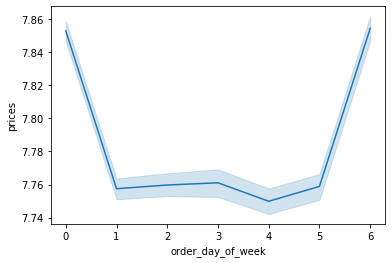

In [24]:
# line chart (with subset)
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

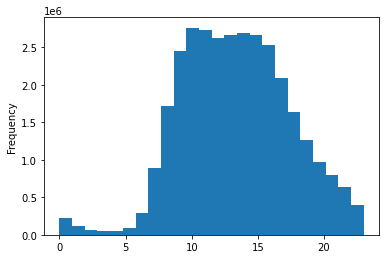

In [25]:
# 3 - histogram
hist_hours = df['order_hour_of_day'].plot.hist(bins = 24)

###### The histogram shows us the frequency of the 'order_hour_of_day' column. We can see that the most orders have been made between 10 and 16 o'clock - and almost none at around 4am. Which makes sense because that's when we (should) sleep :)

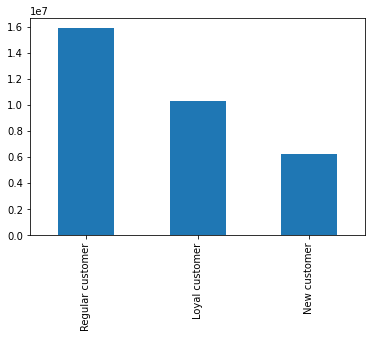

In [26]:
# 4 - bar chart
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar()

In [27]:
# 5 - line chart
# df with only 'order_hour_of_day' and 'prices' as columns
hours_prices = small[['order_hour_of_day','prices']]

In [28]:
# check
hours_prices.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


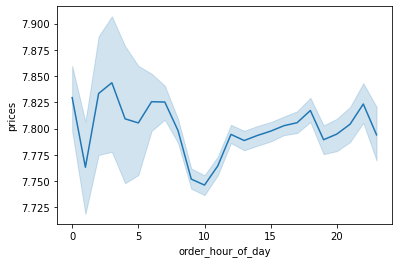

In [29]:
# line chart (with subset)
line_hours = sns.lineplot(data = hours_prices, x = 'order_hour_of_day', y = 'prices')

In [30]:
# 7 - line chart
# df with only 'n_dependents' and 'age' as columns
dependants_age = small[['n_dependants','age']]

In [31]:
# check
dependants_age.head()

,n_dependants,age
0,3,31
2,3,31
3,3,31
6,3,31
10,3,31


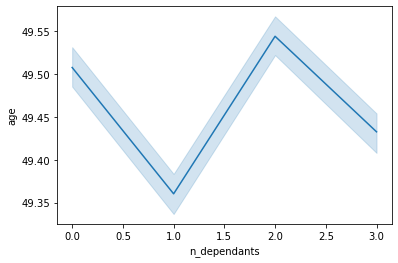

In [32]:
# line chart (with subset)
line_dependants = sns.lineplot(data = dependants_age, x = 'n_dependants', y = 'age')

In [33]:
# sample for scatterplot
income_age = small[['income','age']]

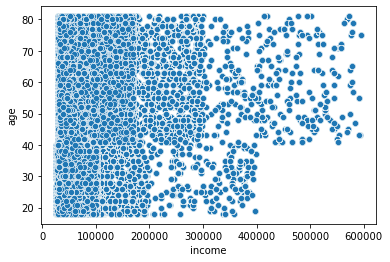

In [34]:
# create scatter plot
scatterplot_income = sns.scatterplot(x = 'income', y = 'age', data = income_age)

###### The older the customer the more they earn. For example there are no customers under the age of 40 earning more than 400'000. A lot of customers earn up to 200'000.

In [37]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar.png'))

In [38]:
sorted_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sorted_bar.png'))

In [39]:
colored_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'colored_bar.png'))

In [40]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist.png'))

In [41]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot.png'))

In [42]:
histogram_25.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_25.png'))

In [43]:
histogram_75.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_75.png'))

In [44]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line.png'))

In [45]:
hist_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hours.png'))

In [46]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [47]:
line_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hours.png'))

In [48]:
line_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dependants.png'))

In [49]:
scatterplot_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_income.png'))